<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/frequency_domain(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Resolusi gambar 1: 220x386x3 piksel


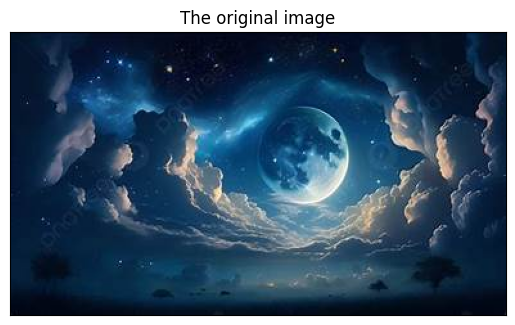

In [27]:
urllib.request.urlretrieve(
'https://tse1.mm.bing.net/th?id=OIP.N6gaby63gxS90yGZGeNAmAAAAA&pid=Api&P=0&h=220', # link from google image
"gambar_1.png")

# load image in BGR format
image_1 = cv2.imread('gambar_1.png')

# Convert BGR to RGB before displaying with Matplotlib
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)


# Dapatkan resolusi gambar dalam piksel
width, height, channel = image_1_rgb.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

plt.title('The original image')
# Display the RGB image
plt.imshow(image_1_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

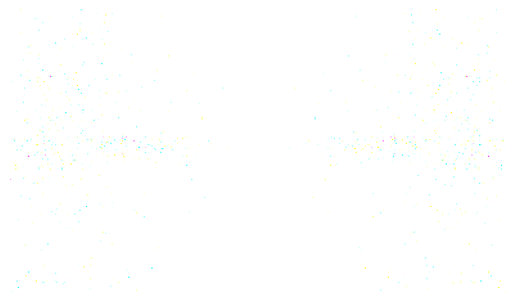

In [28]:
# transform image into freq. domain and shifted
F = np.fft.fft2(image_1_rgb)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


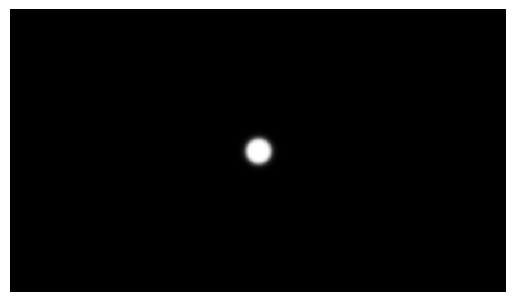

In [29]:
# Butterwort Low Pass Filter
M,N, _ = image_1_rgb.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

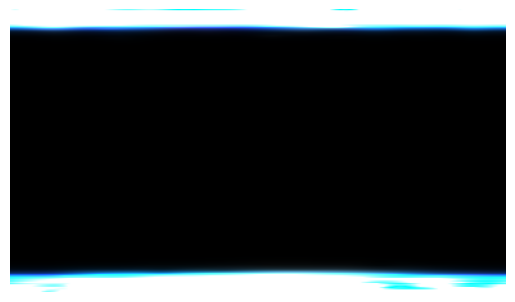

In [30]:
# frequency domain image filters
# Create a filter with the same number of channels as the image
H = np.stack([H, H, H], axis=-1)  # Stack H three times to match RGB channels

Gshift = Fshift * H  # Now the shapes are compatible
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

<ipython-input-31-855665197692>:8: RuntimeWarning: divide by zero encountered in scalar divide
  HPF[u,v] = 1 / (1 + (D0/D)**n)


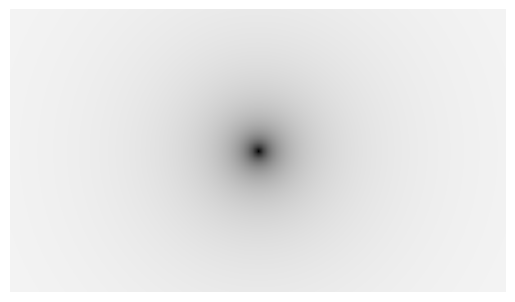

In [31]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N, _), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

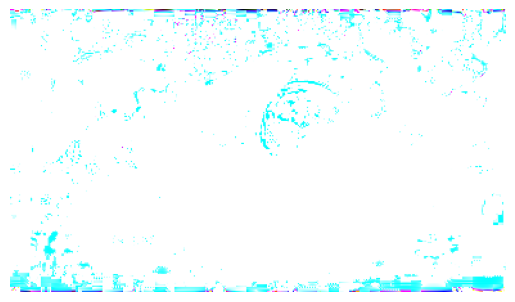

In [32]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()